# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Membaca dan Melihat Data

In [2]:
df = pd.read_csv('../Dataset/fish_data.csv')

In [3]:
print("5 data pertama:")
print(df.head())

5 data pertama:
              species  length  weight  w_l_ratio
0  Anabas testudineus   10.66    3.45       0.32
1  Anabas testudineus    6.91    3.27       0.47
2  Anabas testudineus    8.38    3.46       0.41
3  Anabas testudineus    7.57    3.36       0.44
4  Anabas testudineus   10.83    3.38       0.31


In [4]:
# Melihat informasi dataset
print("\nInformasi dataset:")
print(df.info())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB
None


# Persiapan Data

In [5]:
# Memisahkan fitur (X) dan target (y)
X = df[['length', 'weight', 'w_l_ratio']]
y = df['species']

In [6]:
# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Mengubah label species menjadi numerik
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [8]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

Jumlah data training: 3264
Jumlah data testing: 816


# Membuat dan Melatih Model

In [9]:
# Membuat model Perceptron
perceptron_model = Perceptron(
    max_iter=1000,
    random_state=42,
)

# Melatih model
perceptron_model.fit(X_train, y_train)

Perceptron(random_state=42)

# Evaluasi Model

In [10]:
# Membuat prediksi
y_pred = perceptron_model.predict(X_test)

In [11]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy*100:.2f}%")

Akurasi model: 74.75%


In [12]:
# Menampilkan laporan klasifikasi lengkap
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Laporan Klasifikasi:
                        precision    recall  f1-score   support

    Anabas testudineus       0.97      1.00      0.98       120
     Coilia dussumieri       1.00      0.97      0.99        77
Otolithoides biauritus       0.00      0.00      0.00        91
     Otolithoides pama       0.31      1.00      0.47        86
     Pethia conchonius       0.99      0.92      0.95        89
  Polynemus paradiseus       0.93      0.96      0.95       102
  Puntius lateristriga       1.00      0.97      0.98        65
        Setipinna taty       0.00      0.00      0.00       100
 Sillaginopsis panijus       1.00      1.00      1.00        86

              accuracy                           0.75       816
             macro avg       0.69      0.76      0.70       816
          weighted avg       0.68      0.75      0.69       816



c:\Users\Personal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Personal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Personal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

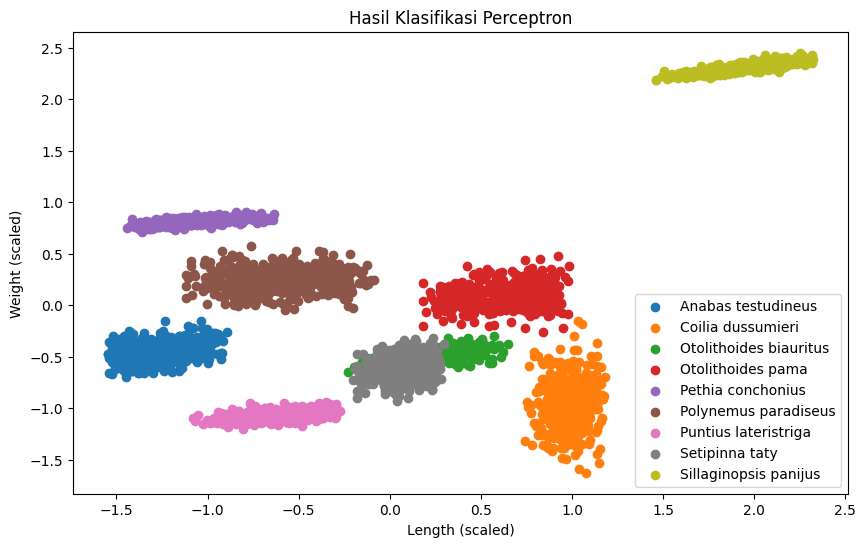

In [13]:
# Visualisasi hasil prediksi
def plot_decision_regions(X, y, classifier):
    # Mengambil dua fitur pertama untuk visualisasi
    X = X[:, [0, 1]]
    
    # Plot scatter
    plt.figure(figsize=(10, 6))
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(X[y == cl, 0], 
                   X[y == cl, 1],
                   label=le.inverse_transform([cl])[0])
    
    plt.xlabel('Length (scaled)')
    plt.ylabel('Weight (scaled)')
    plt.title('Hasil Klasifikasi Perceptron')
    plt.legend()
    plt.show()

# Plot hasil
plot_decision_regions(X_scaled, y_encoded, perceptron_model)

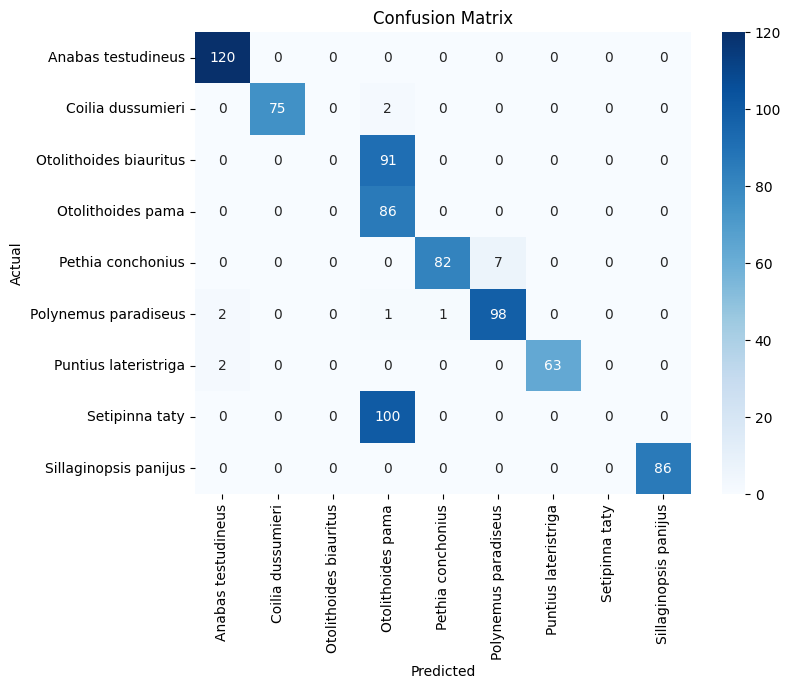

In [14]:
# Visualisasi confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Contoh Prediksi


In [15]:
# Membuat beberapa prediksi contoh
print("Contoh prediksi:")
for i in range(10):
    actual = le.inverse_transform([y_test[i]])[0]
    predicted = le.inverse_transform([y_pred[i]])[0]
    print(f"Data ke-{i+1}:")
    print(f"Aktual: {actual}")
    print(f"Prediksi: {predicted}")
    print("---")

Contoh prediksi:
Data ke-1:
Aktual: Anabas testudineus
Prediksi: Anabas testudineus
---
Data ke-2:
Aktual: Setipinna taty
Prediksi: Otolithoides pama
---
Data ke-3:
Aktual: Otolithoides pama
Prediksi: Otolithoides pama
---
Data ke-4:
Aktual: Polynemus paradiseus
Prediksi: Polynemus paradiseus
---
Data ke-5:
Aktual: Anabas testudineus
Prediksi: Anabas testudineus
---
Data ke-6:
Aktual: Otolithoides pama
Prediksi: Otolithoides pama
---
Data ke-7:
Aktual: Otolithoides biauritus
Prediksi: Otolithoides pama
---
Data ke-8:
Aktual: Sillaginopsis panijus
Prediksi: Sillaginopsis panijus
---
Data ke-9:
Aktual: Sillaginopsis panijus
Prediksi: Sillaginopsis panijus
---
Data ke-10:
Aktual: Otolithoides pama
Prediksi: Otolithoides pama
---


#  Prediksi dengan Data Baru

In [16]:
# Contoh data baru
data_baru = pd.DataFrame({
    'length': [8.5],
    'weight': [3.2],
    'w_l_ratio': [0.38]
})

# Melakukan prediksi
prediksi = perceptron_model.predict(data_baru)
jenis_ikan = le.inverse_transform(prediksi)[0]

print("Prediksi untuk data baru:")
print(f"Length: {data_baru['length'][0]}")
print(f"Weight: {data_baru['weight'][0]}")
print(f"W/L Ratio: {data_baru['w_l_ratio'][0]}")
print(f"Prediksi jenis ikan: {jenis_ikan}")

Prediksi untuk data baru:
Length: 8.5
Weight: 3.2
W/L Ratio: 0.38
Prediksi jenis ikan: Coilia dussumieri


c:\Users\Personal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Perceptron was fitted without feature names
  warnings.warn(
